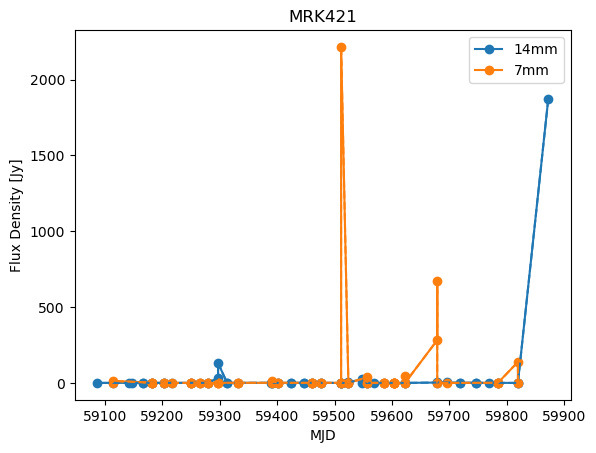

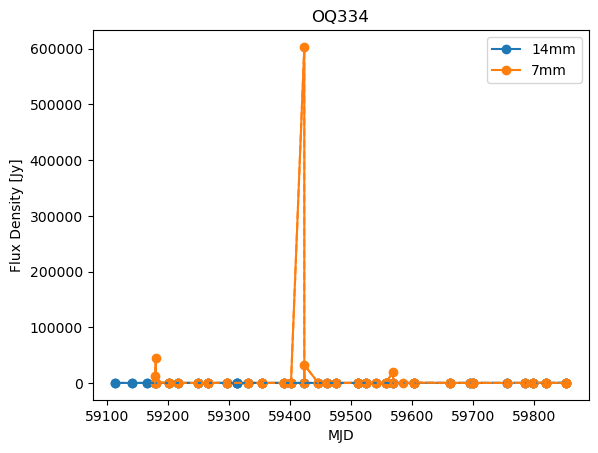

In [11]:
import pandas as pd
from scipy import integrate
import numpy as np

data = pd.read_csv("Mrk421_data_students.csv")

mm14_data = data[(data['Frequency [GHz]'] >= 19) & (data['Frequency [GHz]'] <= 25)]

v1 = 19.25  # GHz
v2 = 24.75  # GHz

def flux_density(v, C, alpha):
    return C*(v**alpha)

averaged_flux_densities = []

for date in mm14_data['MJD'].unique():
    fluxes = mm14_data[mm14_data['MJD'] == date]['Flux Density [Jy]'].values
    errors = mm14_data[mm14_data['MJD'] == date]['Error [Jy]'].values
    frequencies = mm14_data[mm14_data['MJD'] == date]['Frequency [GHz]'].values.flatten() # use flatten() to convert to 1D array
    if frequencies[-1] == frequencies[0]:
        alpha = 0
    else:
        alpha = np.log(fluxes[-1]/fluxes[0]) / np.log(frequencies[-1]/frequencies[0])
    C_plus = np.sum((fluxes + errors)*frequencies**(-alpha)) / np.sum(frequencies**(-alpha))
    C_minus = np.sum((fluxes - errors)*frequencies**(-alpha)) / np.sum(frequencies**(-alpha))
    S_plus, _ = integrate.quad(flux_density, v1, v2, args=(C_plus, alpha))
    S_minus, _ = integrate.quad(flux_density, v1, v2, args=(C_minus, alpha))
    S_avg, _ = integrate.quad(flux_density, v1, v2, args=((C_plus+C_minus)/2, alpha))
    S_plus /= (v2-v1)
    S_minus /= (v2-v1)
    S_avg /= (v2-v1)
    delta_S = max(abs(S_avg - S_plus), abs(S_avg - S_minus))
    averaged_flux_densities.append([date, S_avg, delta_S])

averaged_flux_densities = pd.DataFrame(averaged_flux_densities, columns=['MJD', 'Flux Density [Jy]', 'Uncertainty [Jy]'])
averaged_flux_densities.to_csv("Mrk421_14mm.csv", index=False)

mm36_data = data[(data['Frequency [GHz]'] >= 36) & (data['Frequency [GHz]'] <= 44)]

v3 = 36.25  # GHz
v4 = 43.75  # GHz

averaged_flux_densities_36mm = []

for date in mm36_data['MJD'].unique():
    fluxes = mm36_data[mm36_data['MJD'] == date]['Flux Density [Jy]'].values
    errors = mm36_data[mm36_data['MJD'] == date]['Error [Jy]'].values
    frequencies =mm36_data[mm36_data['MJD'] == date]['Frequency [GHz]'].values.flatten() # use flatten() to convert to 1D array
    if frequencies[-1] == frequencies[0]:
        alpha = 0
    else:
        alpha = np.log(fluxes[-1]/fluxes[0]) / np.log(frequencies[-1]/frequencies[0])
    C_plus = np.sum((fluxes + errors)*frequencies**(-alpha)) / np.sum(frequencies**(-alpha))
    C_minus = np.sum((fluxes - errors)*frequencies**(-alpha)) / np.sum(frequencies**(-alpha))
    S_plus, _ = integrate.quad(flux_density, v3, v4, args=(C_plus, alpha))
    S_minus, _ = integrate.quad(flux_density, v3, v4, args=(C_minus, alpha))
    S_avg, _ = integrate.quad(flux_density, v3, v4, args=((C_plus+C_minus)/2, alpha))
    S_plus /= (v4-v3)
    S_minus /= (v4-v3)
    S_avg /= (v4-v3)
    delta_S = max(abs(S_avg - S_plus), abs(S_avg - S_minus))
    averaged_flux_densities_36mm.append([date, S_avg, delta_S])

averaged_flux_densities_36mm = pd.DataFrame(averaged_flux_densities_36mm, columns=['MJD', 'Flux Density [Jy]', 'Uncertainty [Jy]'])
averaged_flux_densities_36mm.to_csv("Mrk421_7mm.csv", index=False)

import matplotlib.pyplot as plt

mm14_data = pd.read_csv("Mrk421_14mm.csv")
mm7_data = pd.read_csv("Mrk421_7mm.csv")

plt.plot(mm14_data['MJD'].unique(), mm14_data.groupby('MJD')['Flux Density [Jy]'].mean(), 'o-', label='14mm')

plt.plot(mm7_data['MJD'].unique(), mm7_data.groupby('MJD')['Flux Density [Jy]'].mean(), 'o-', label='7mm')

plt.gca().set_prop_cycle(None) 
plt.plot(mm14_data['MJD'].unique(), mm14_data.groupby('MJD')['Flux Density [Jy]'].mean(), '--')
plt.plot(mm7_data['MJD'].unique(), mm7_data.groupby('MJD')['Flux Density [Jy]'].mean(), '--')

plt.xlabel('MJD')
plt.ylabel('Flux Density [Jy]')
plt.title("MRK421")
plt.legend()

plt.show()

data = pd.read_csv("OQ334_data_students.csv")

oq334_data = data[(data['Frequency [GHz]'] >= 19) & (data['Frequency [GHz]'] <= 25)]

v1 = 19.25 
v2 = 24.75 

def flux_density(v, C, alpha):
    return C*(v**alpha)

averaged_flux_densities0 = []

for date in oq334_data['MJD'].unique():
    fluxes = oq334_data[oq334_data['MJD'] == date]['Flux Density [Jy]'].values
    errors = oq334_data[oq334_data['MJD'] == date]['Error [Jy]'].values
    frequencies = oq334_data[oq334_data['MJD'] == date]['Frequency [GHz]'].values.flatten() # use flatten() to convert to 1D array
    if frequencies[-1] == frequencies[0]:
        alpha = 0
    else:
        alpha = np.log(fluxes[-1]/fluxes[0]) / np.log(frequencies[-1]/frequencies[0])
    C_plus = np.sum((fluxes + errors)*frequencies**(-alpha)) / np.sum(frequencies**(-alpha))
    C_minus = np.sum((fluxes - errors)*frequencies**(-alpha)) / np.sum(frequencies**(-alpha))
    S_plus, _ = integrate.quad(flux_density, v1, v2, args=(C_plus, alpha))
    S_minus, _ = integrate.quad(flux_density, v1, v2, args=(C_minus, alpha))
    S_avg, _ = integrate.quad(flux_density, v1, v2, args=((C_plus+C_minus)/2, alpha))
    S_plus /= (v2-v1)
    S_minus /= (v2-v1)
    S_avg /= (v2-v1)
    delta_S = max(abs(S_avg - S_plus), abs(S_avg - S_minus))
    averaged_flux_densities0.append([date, S_avg, delta_S])


averaged_flux_densities0 = pd.DataFrame(averaged_flux_densities0, columns=['MJD', 'Flux Density [Jy]', 'Uncertainty [Jy]'])
averaged_flux_densities0.to_csv("OQ334_14mm.csv", index=False)

oq33_data = data[(data['Frequency [GHz]'] >= 36) & (data['Frequency [GHz]'] <= 44)]

averaged_flux_densities1 = []

for date in oq33_data['MJD'].unique():
    fluxes = oq33_data[oq33_data['MJD'] == date]['Flux Density [Jy]'].values
    errors = oq33_data[oq33_data['MJD'] == date]['Error [Jy]'].values
    frequencies =oq33_data[oq33_data['MJD'] == date]['Frequency [GHz]'].values.flatten() # use flatten() to convert to 1D array
    if frequencies[-1] == frequencies[0]:
        alpha = 0
    else:
        alpha = np.log(fluxes[-1]/fluxes[0]) / np.log(frequencies[-1]/frequencies[0])
    C_plus = np.sum((fluxes + errors)*frequencies**(-alpha)) / np.sum(frequencies**(-alpha))
    C_minus = np.sum((fluxes - errors)*frequencies**(-alpha)) / np.sum(frequencies**(-alpha))
    S_plus, _ = integrate.quad(flux_density, v3, v4, args=(C_plus, alpha))
    S_minus, _ = integrate.quad(flux_density, v3, v4, args=(C_minus, alpha))
    S_avg, _ = integrate.quad(flux_density, v3, v4, args=((C_plus+C_minus)/2, alpha))
    S_plus /= (v4-v3)
    S_minus /= (v4-v3)
    S_avg /= (v4-v3)
    delta_S = max(abs(S_avg - S_plus), abs(S_avg - S_minus))
    averaged_flux_densities1.append([date, S_avg, delta_S])


averaged_flux_densities1 = pd.DataFrame(averaged_flux_densities1, columns=['MJD', 'Flux Density [Jy]', 'Uncertainty [Jy]'])
averaged_flux_densities1.to_csv("OQ334_7mm.csv", index=False)

import matplotlib.pyplot as plt

OQ14_data = pd.read_csv("OQ334_14mm.csv")
OQ7_data = pd.read_csv("OQ334_7mm.csv")

plt.plot(OQ14_data['MJD'].unique(), OQ14_data.groupby('MJD')['Flux Density [Jy]'].mean(), 'o-', label='14mm')

plt.plot(OQ7_data['MJD'].unique(), OQ7_data.groupby('MJD')['Flux Density [Jy]'].mean(), 'o-', label='7mm')

plt.gca().set_prop_cycle(None)  # reset color cycle
plt.plot(OQ14_data['MJD'].unique(), OQ14_data.groupby('MJD')['Flux Density [Jy]'].mean(), '--')
plt.plot(OQ7_data['MJD'].unique(),OQ7_data.groupby('MJD')['Flux Density [Jy]'].mean(), '--')

plt.xlabel('MJD')
plt.ylabel('Flux Density [Jy]')
plt.title("OQ334")
plt.legend()

# Show the plot
plt.show()



In [40]:
import pandas as pd

# Load the light curve file
l = pd.read_csv('Mrk421_14mm.csv')

# Add a time column to the light curve
l['time'] = (l['MJD'] - l['MJD'].min()) * 86400

# Save the modified light curve file
l.to_csv('Mrk421_14mm_modified.csv', index=False)

lc = pd.read_csv('Mrk421_7mm.csv')

# Add a time column to the light curve
lc['time'] = (lc['MJD'] - lc['MJD'].min()) * 86400

# Save the modified light curve file
lc.to_csv('Mrk421_7mm_modified.csv', index=False)

lo = pd.read_csv('OQ334_14mm.csv')

# Add a time column to the light curve
lo['time'] = (lo['MJD'] - lo['MJD'].min()) * 86400
# Save the modified light curve file
lo.to_csv('OQ334_14mm_modified.csv', index=False)

li = pd.read_csv('OQ334_7mm.csv')

# Add a time column to the light curve
li['time'] = (li['MJD'] - li['MJD'].min()) * 86400

li.to_csv('OQ334_7mm_modified.csv', index=False)

lc_14mm = pd.read_csv('Mrk421_14mm_modified.csv')

# Load the 7mm light curve file
lc_7mm = pd.read_csv('Mrk421_7mm_modified.csv')

# Sort the light curves by time
lc_14mm = lc_14mm.sort_values('time')
lc_7mm = lc_7mm.sort_values('time')

# Compute the time differences between adjacent data points
dt_14mm = lc_14mm['time'].diff().mean()
dt_7mm = lc_7mm['time'].diff().mean()

# Compute the averaged sampling time across both light curves
dt_avg = (dt_14mm + dt_7mm) / 2

source_name = 'Mrk421' #set to Mrk421 or OQ334, names the output files by source_name

comp_DCF = True #if comp_DCF == True, the Discrete Cross-Correlation Function will be computed
binsize = dt_avg
comp_ICF = True #if comp_ICF == True, the Interpolated Cross-Correlation Function will be computed
interp_unit = dt_avg/2
interp_first = True #if interp_first == True, the first light curve will be interpolated
interp_second = True #if interp_second == True, the second light curve will be interpolated

import numpy as np

#Function to compute the DCF
def dcf_funct(first, second, binsize, startfactor, output_filename):
#first: first light curve (LC) (as Pandas Dataframe with columns: mjd, flux density, uncertainty of flux density)
#second: second LC (as Pandas Dataframe with columns: mjd, flux density, uncertainty of flux density)
#startfactor: 1/3 of duration where LCs overlap in sampling / binsize
    first_mjd = first.iloc[:, 0].values
    first_flux = first.iloc[:, 1].values
    second_mjd = second.iloc[:, 0].values
    second_flux = second.iloc[:,1].values
    lag_array = np.array([])
    dcf_array = np.array([])
    dcf_err_array = np.array([])

    interval = 2. * startfactor + 1.
    #Compute DCF
    for i in range(int(interval)):
        if i > 0:
            lag = lag_array[i - 1] + binsize
        else:
            lag = -startfactor * binsize
        lag_array = np.append(lag_array, lag)
        #Compute correlation coefficient
        corr_flux1 = np.array([])
        corr_flux2 = np.array([])
        for j in range(len(first_flux)):
            flux2 = second_flux[np.where(second_mjd >= first_mjd[j] + lag - binsize / 2.)]
            mjd2 = second_mjd[np.where(second_mjd >= first_mjd[j] + lag - binsize / 2.)]
            flux2 = flux2[np.where(mjd2 < first_mjd[j] + lag + binsize / 2.)]
            corr_flux2 = np.append(corr_flux2, flux2)
            if len(flux2) > 0:
                corr_flux1 = np.append(corr_flux1, np.full_like(flux2, first_flux[j]))
        if len(corr_flux2) >= 2:		 
            udcf = (corr_flux1 - np.mean(corr_flux1)) * (corr_flux2 - np.mean(corr_flux2)) / np.sqrt(np.sum((corr_flux1 - np.mean(corr_flux1)) ** 2.) / len(corr_flux1) * np.sum((corr_flux2 - np.mean(corr_flux2)) ** 2.) / len(corr_flux2))
            dcf_value = np.mean(udcf)
            dcf_array = np.append(dcf_array, dcf_value)
            dcf_err = np.sqrt(np.sum((udcf - dcf_value) ** 2.)/((len(udcf) - 1) * (len(udcf))))
            dcf_err_array = np.append(dcf_err_array, dcf_err)
        else:
            dcf_array = np.append(dcf_array, np.nan)
            dcf_err_array = np.append(dcf_err_array, np.nan)
    dcf = pd.DataFrame()
    dcf["Correlation_Coefficient"] = dcf_array
    dcf["Error"] = dcf_err_array
    dcf["Lag"] = lag_array
    dcf_df = pd.DataFrame({"lag": lag_array, "DCF": dcf_array, "DCF_err": dcf_err_array})
    dcf_df.to_csv(output_filename, index=False)
    dcf.dropna(inplace = True)
    return dcf

#Function to compute the ICF
def icf_funct(first, second, interp_unit, startfactor, interp_first, interp_second,output_filename):
    #first: first light curve (LC) (as Pandas Dataframe with columns: mjd, flux density, uncertainty of flux density)
    #second: second LC (as Pandas Dataframe with columns: mjd, flux density, uncertainty of flux density)
    #interp_unit: interpolation unit where LCs will be interpolated
    #startfactor: 1/3 of duration where LCs overlap in sampling / interpolation unit
    #interp_first: if True, the first LC will be interpolated
    #interp_second: if True, the second LC will be interpolated
    first_mjd = first.iloc[:, 0].values
    first_flux = first.iloc[:, 1].values
    second_mjd = second.iloc[:, 0].values
    second_flux = second.iloc[:, 1].values
    lag_array = np.array([])
    icf1_array = np.array([])
    icf2_array = np.array([])
    weight1_array = np.array([])
    weight2_array = np.array([])
    interval = 2. * startfactor + 1.
    if interp_first == False and interp_second == False:
        print("No light curve is chosen to be interpolated!")
        print("Please choose which light curve should be interpolated by setting interp_first and/or interp_second to True!")
        icf = pd.DataFrame()
    else:
        for i in range(int(interval)):
            if i > 0:
                lag = lag_array[i - 1] + interp_unit
            else:
                lag = -startfactor * interp_unit
            lag_array = np.append(lag_array, lag)
            if interp_second == True:
                flux1 = first_flux[np.where(first_mjd <= np.max(second_mjd) + lag- binsize /2.)]
                mjd1 = first_mjd[np.where(first_mjd <= np.max(second_mjd) + lag - binsize / 2.)]
                flux1 = flux1[np.where(mjd1 >= np.min(second_mjd) + lag+ binsize /2.)]
                mjd1 = mjd1[np.where(mjd1 >= np.min(second_mjd) - lag)]
                flux2_interp = np.interp(mjd1 + lag, second_mjd, second_flux)
                weight1_array = np.append(weight1_array, len(mjd1))
                icf1_value = np.nanmean((flux1 - np.nanmean(flux1)) * (flux2_interp - np.nanmean(flux2_interp)) / (np.nanstd(flux1) * np.nanstd(flux2_interp)))
                icf1_array = np.append(icf1_array, icf1_value)
            if interp_first == True:
                flux2 = second_flux[np.where(second_mjd <= np.max(first_mjd) + lag - binsize /2.)]
                mjd2 = second_mjd[np.where(second_mjd <= np.max(first_mjd) + lag- binsize / 2.)]
                flux2 = flux2[np.where(mjd2 >= np.min(first_mjd) + lag + binsize / 2.)]
                mjd2 = mjd2[np.where(mjd2 >= np.min(first_mjd) + lag)]
                flux1_interp = np.interp(mjd2 - lag, first_mjd, first_flux)
                weight2_array = np.append(weight2_array, len(mjd2))
                icf2_value = np.nanmean((flux1_interp - np.nanmean(flux1_interp)) * (flux2 - np.nanmean(flux2)) / (np.nanstd(flux1_interp) * np.nanstd(flux2)))
                icf2_array = np.append(icf2_array, icf2_value)
        if interp_second == True and interp_first == False:
            icf_array = icf1_array
        elif interp_second == False and interp_first == True:
            icf_array = icf2_array
        elif interp_second == True and interp_first == True:
            icf_array = (icf1_array * weight1_array + icf2_array * weight2_array) / (weight1_array + weight2_array)
        icf = pd.DataFrame()
        icf["Lag"] = lag_array
        icf["Correlation_Coefficient"] = icf_array
        icf_df = pd.DataFrame({"lag": lag_array, "ICF": icf_array})
        icf_df.to_csv(output_filename, index=False)
    return icf

#Load first light curve (LC)
first = pd.read_csv('Mrk421_14mm_modified.csv')
first.astype(float)
first.columns = ['MJD', 'Flux Density [Jy]', 'Uncertainty [Jy]', 'time']
first.sort_values(by = ['MJD'], inplace = True)

#Load second LC
second = pd.read_csv('Mrk421_7mm_modified.csv')
second.astype(float)
second.columns = ['MJD', 'Flux Density [Jy]', 'Uncertainty [Jy]','time']
second.sort_values(by = ['MJD'], inplace = True)

#Compute duration where the LCs overlap in sampling
first_mjd = first["time"].values
second_mjd = second["time"].values

if np.min(first_mjd) < np.min(second_mjd):
    t_min = np.min(second_mjd)
else:
    t_min = np.min(first_mjd)

if np.max(first_mjd) < np.max(second_mjd):
    t_max = np.max(first_mjd)
else:
    t_max = np.max(second_mjd)

overlap_duration = t_max - t_min

#Compute DCF
if comp_DCF == True:
    print("Compute DCF")
    print(f"Binsize = {binsize:.3f} days")
    #Compute startfactor
    dcf_startfactor = np.around((1. / 3.) * overlap_duration / binsize)
    #Compute DCF
    DCF = dcf_funct(first = first, second = second, binsize = binsize, startfactor = dcf_startfactor, output_filename= "DCF42114.csv")
    DCF.to_csv("results.csv" + source_name + "_dcf.csv", index = False)
    DCF_lag = DCF.iloc[:, 0].values
    DCF_coefficient = DCF.iloc[:, 1].values
    DCF_error = DCF.iloc[:, 2].values
    DCF_coefficient_max_total = np.max(DCF_coefficient)
    DCF_error_max_total = DCF_error[np.where(DCF_coefficient == DCF_coefficient_max_total)]
    DCF_lag_max_total = DCF_lag[np.where(DCF_coefficient == DCF_coefficient_max_total)]
    print(DCF_lag_max_total)
    print(f"Peak correlation coefficient = {DCF_coefficient_max_total:.3f} +/- {DCF_error_max_total[0]:.3f}")
    print(f"Peak time lag = {DCF_lag_max_total[0]:.3f} days")
else:
    print("DCF is not computed!")

#Compute ICF
if comp_ICF == True:
    print("\nCompute ICF")
    print(f"Interpolation unit = {interp_unit:.3f} days\n")
    #Compute startfactor
    icf_startfactor = np.around((1. / 3.) * overlap_duration / interp_unit)
    #Compute ICF
    if interp_first == True and interp_second == False:
        print("Only first light curve is interpolated!\n")
    elif interp_first == False and interp_second == True:
        print("Only second light curve is interpolated!\n")
    elif interp_first == True and interp_second == True:
        print("Both light curve are interpolated!")
        print("The ICF is computed twice.")
        print("In the first pass, the second light curve is interpolated.")
        print("In the second pass, the first light curve is interpolated.")
        print("The results from the two passes are averaged.\n")
    ICF = icf_funct(first = first, second = second, interp_unit = interp_unit, startfactor = icf_startfactor, interp_first = interp_first, interp_second = interp_second, output_filename="ICF42114.csv")
    ICF_empty = ICF.empty
    if ICF_empty == False:
        ICF.to_csv("results.csv" + source_name + "_icf.csv", index = False)
        ICF_lag = ICF.iloc[:, 0].values
        ICF_coefficient = ICF.iloc[:, 1].values
        ICF_coefficient_max_total = np.max(ICF_coefficient)
        print(ICF_coefficient_max_total)
        ICF_lag_max_total = ICF_lag[np.where(ICF_coefficient == ICF_coefficient_max_total)]
        print(ICF_lag_max_total)
        print(f"Peak correlation coefficient = {ICF_coefficient_max_total:.3f}")
        print(f"Peak time lag = {ICF_lag_max_total[0]:.3f} days")
else:
    print("ICF is not computed!")

import matplotlib.pyplot as plt

l_14m = pd.read_csv('OQ334_14mm_modified.csv')

# Load the 7mm light curve file
l_7m = pd.read_csv('OQ334_7mm_modified.csv')

# Sort the light curves by time
l_14m = l_14m.sort_values('time')
l_7m = l_7m.sort_values('time')

# Compute the time differences between adjacent data points
d_14m = l_14m['time'].diff().mean()
d_7m = l_7m['time'].diff().mean()

# Compute the averaged sampling time across both light curves
d_av = (d_14m + d_7m) / 2
source_name1 = 'OQ334'
binsize1 = d_av
interp_unit1 = d_av/2

third = pd.read_csv('OQ334_14mm.csv')
third.astype(float)
third.columns = ['MJD', 'Flux Density [Jy]', 'Uncertainty [Jy]','time']
third.sort_values(by = ['MJD'], inplace = True)

#Load second LC
fourth = pd.read_csv('OQ334_7mm.csv')
fourth.astype(float)
fourth.columns = ['MJD', 'Flux Density [Jy]', 'Uncertainty [Jy]','time']
fourth.sort_values(by = ['MJD'], inplace = True)

#Compute duration where the LCs overlap in sampling
third_mjd = third.iloc[:, 0].values
fourth_mjd = fourth.iloc[:, 0].values

if np.min(third_mjd) < np.min(fourth_mjd):
    t_min1 = np.min(fourth_mjd)
else:
    t_min1 = np.min(third_mjd)

if np.max(third_mjd) < np.max(fourth_mjd):
    t_max1 = np.max(third_mjd)
else:
    t_max1 = np.max(fourth_mjd)

overlap_duration1 = t_max1 - t_min1

#Compute DCF
if comp_DCF == True:
    print("Compute DCF")
    print(f"Binsize = {binsize1:.3f} days")
    #Compute startfactor
    dcf_startfactor1 = np.around((1. / 3.) * overlap_duration1 / binsize1)
    #Compute DCF
    DCF1 = dcf_funct(first = third, second = fourth, binsize = binsize1, startfactor = dcf_startfactor1, output_filename="DCF334.csv")
    DCF1.to_csv("results1.csv" + source_name + "_dcf.csv", index = False)
    DCF_lag1 = DCF1.iloc[:, 0].values
    DCF_coefficient1 = DCF1.iloc[:, 1].values
    DCF_error1 = DCF1.iloc[:, 2].values
    DCF_coefficient_max_total1 = np.max(DCF_coefficient1)
    DCF_error_max_total1 = DCF_error1[np.where(DCF_coefficient1 == DCF_coefficient_max_total1)]
    DCF_lag_max_total1 = DCF_lag1[np.where(DCF_coefficient1 == DCF_coefficient_max_total1)]
    print(f"Peak correlation coefficient = {DCF_coefficient_max_total1:.3f} +/- {DCF_error_max_total1[0]:.3f}")
    print(f"Peak time lag = {DCF_lag_max_total1[0]:.3f} days")

else:
    print("DCF is not computed!")

if comp_ICF == True:
    print("\nCompute ICF")
    print(f"Interpolation unit = {interp_unit1:.3f} days\n")
    icf_startfactor1 = np.around((1. / 3.) * overlap_duration1 / interp_unit1)
    #Compute ICF
    if interp_first == True and interp_second == False:
        print("Only first light curve is interpolated!\n")
    elif interp_first == False and interp_second == True:
        print("Only second light curve is interpolated!\n")
    elif interp_first == True and interp_second == True:
        print("Both light curve are interpolated!")
        print("The ICF is computed twice.")
        print("In the first pass, the second light curve is interpolated.")
        print("In the second pass, the first light curve is interpolated.")
        print("The results from the two passes are averaged.\n")
        ICF1 = icf_funct(first= third, second = fourth, interp_unit = interp_unit1, startfactor = icf_startfactor1, interp_first = interp_first, interp_second = interp_second,output_filename="ICF334.csv")
    ICF_empty1 = ICF1.empty
    if ICF_empty1 == False:
        ICF1.to_csv("results.csv" + source_name + "_icf.csv", index = False)
        ICF_lag1 = ICF1.iloc[:, 0].values
        ICF_coefficient1 = ICF1.iloc[:, 1].values
        ICF_coefficient_max_total1 = np.max(ICF_coefficient1)
        ICF_lag_max_total1 = ICF_lag1[np.where(ICF_coefficient1 == ICF_coefficient_max_total1)]
        print(f"Peak correlation coefficient = {ICF_coefficient_max_total1:.3f}")
        print(f"Peak time lag = {ICF_lag_max_total1[0]:.3f} days")

else:
    print("ICF is not computed!")

print(ICF1)

# Load DCF files
dcf_14mm_7mm = pd.read_csv("DCF42114.csv")
dcf_7mm_14mm = pd.read_csv("DCF334.csv")

# Load ICF files
icf_14mm_7mm = pd.read_csv("ICF42114.csv")
print(icf_14mm_7mm)
icf_7mm_14mm = pd.read_csv("ICF334.csv")

# Create subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

# Plot DCF
axs[0].plot(dcf_14mm_7mm["lag"], dcf_14mm_7mm["DCF"], label="14mm-7mm")
axs[0].plot(dcf_7mm_14mm["lag"], dcf_7mm_14mm["DCF"], label="7mm-14mm")
axs[0].set_xlabel("Time lag (days)")
axs[0].set_ylabel("DCF")
axs[0].set_title("Discrete Cross-Correlation Function")
axs[0].legend()

# Plot ICF
axs[1].plot(icf_14mm_7mm["lag"], icf_14mm_7mm["ICF"], label="14mm-7mm")
axs[1].plot(icf_7mm_14mm["lag"], icf_7mm_14mm["ICF"], label="7mm-14mm")
axs[1].set_xlabel("Time lag (days)")
axs[1].set_ylabel("ICF")
axs[1].set_title("Inter")
axs[1].legend()




Compute DCF
Binsize = 1082393.394 days
[6.30463267e-18]
Peak correlation coefficient = 0.017 +/- 0.000
Peak time lag = 0.000 days

Compute ICF
Interpolation unit = 541196.697 days

Both light curve are interpolated!
The ICF is computed twice.
In the first pass, the second light curve is interpolated.
In the second pass, the first light curve is interpolated.
The results from the two passes are averaged.



C:\Users\unvee\AppData\Local\Temp\ipykernel_26116\4253644002.py:146: RuntimeWarning: Mean of empty slice
  icf1_value = np.nanmean((flux1 - np.nanmean(flux1)) * (flux2_interp - np.nanmean(flux2_interp)) / (np.nanstd(flux1) * np.nanstd(flux2_interp)))
C:\Users\unvee\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\unvee\AppData\Local\Temp\ipykernel_26116\4253644002.py:155: RuntimeWarning: Mean of empty slice
  icf2_value = np.nanmean((flux1_interp - np.nanmean(flux1_interp)) * (flux2 - np.nanmean(flux2)) / (np.nanstd(flux1_interp) * np.nanstd(flux2)))


ValueError: operands could not be broadcast together with shapes (0,) (62,) 